
# Práctica 1: Metaheurísticas basadas en trayectorias: Temple Simulado

<center><h3>
    Raúl José Salgado García
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guion hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guion. Responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los ejercicios"**. Por favor, no modifiques ninguna línea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_TempleSimulado.zip` que contenga los siguientes ficheros:

 * `APELIDOS_NOME_TempleSimulado.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_TempleSimulado.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problemas utilizados en la resolución.


## Preliminares adicionales sobre Python para esta práctica


Conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte especialmente útiles más adelante en la realización de esta práctica.


Por ejemplo, puedes generar números aleatorios de la siguiente forma utilizando el paquete `random`.

In [30]:
import random

# podemos crear un numero aleatorio entre 1 y 10
numero_aleatorio = random.randint(1, 10)
print(numero_aleatorio)

# y números aleatorios entre 0 y 1 siguiendo también una distribución uniforme
numero_U = random.uniform(0,1)
print (numero_U)


4
0.6427230871958486


Puedes generar vectores de números fijos y aleatorios que a su vez estén barajados de manera aleatoria como se ilustra a continuación.

In [31]:
vector = [x for x in range (1,10)]
print ("vector fijo ", vector)

random.shuffle(vector)
print (vector)

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

random.shuffle(vector_aleatorio)
print (vector_aleatorio)


vector fijo  [1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 8, 5, 9, 4, 6, 1, 7, 3]
vector aleatorio  [5, 10, 9, 9, 10, 10, 5, 5, 6]
[10, 5, 10, 9, 10, 6, 5, 5, 9]


Puedes incluso fijar la semilla para generar números aleatorios si quisieras que la aleatorización fuera determinista (i.e., secuencias de números aletorios que pueden ser reproducibles). Fíjate en el siguiente ejemplo que muestra como esta determina la secuencia de número si se establece una semilla y por tanto su repitibilidad. Esto puede ser útil si queremos asegurar que dos ejecuciones den el mismo resultado.

In [32]:
import time

# este vector será aleatorio si no habíamos establecido una semilla previamente.
# Podríamos tener incluso una semilla basada en el tiempo actual para forzar que se aleatorice 
# si ejecutamos esta celda múltiples veces
random.seed(time.time())

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# aquí establecemos una semilla totalmente fija
# que no depende del tiempo y por tanto está bajo nuestro control
semilla = 123456
random.seed (semilla)

# este viene determinado por la semilla
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# y ahora somos capaces de generar la misma serie "aleatoria"
random.seed (semilla)
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio igual que el anterior", vector_aleatorio)



vector aleatorio  [9, 2, 10, 7, 3, 10, 10, 5, 5]
vector aleatorio  [5, 1, 3, 1, 2, 1, 5, 1, 2]
vector aleatorio igual que el anterior [5, 1, 3, 1, 2, 1, 5, 1, 2]


Un último ejemplo del uso de la semilla sería establecerla justo antes de invocar a una función que queremos hacer la aleatorización totalmente determinista por cuestiones reproducibilidad. Puedes averiguar más en: https://docs.python.org/3/library/random.html

In [33]:

def mi_funcion_pseudo_aleatoria (semilla=None):
    # también podemos recibir la semilla y establecerla en la primera línea
    if (semilla is not None):
        random.seed(semilla)
        
    mi_vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
    return mi_vector_aleatorio
    

random.seed(12345)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)

random.seed(54321)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)

random.seed(12345)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)


vector_aleatorio = mi_funcion_pseudo_aleatoria(12345)
print ("vector aleatorio ", vector_aleatorio)



vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]
vector aleatorio  [8, 2, 4, 3, 9, 9, 7, 3, 6]
vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]
vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]


Otro conjunto de funciones importantes son las que vienen del módulo `math`. Puedes encontrar una lista de las funciones disponibles en https://docs.python.org/3/library/math.html. Ponemos a continuación algunos ejemplos de uso.

In [34]:
import math 

# número e elevado a la potencia indicada
e=math.exp(1)
print (e)

power2_e=math.exp(2)
print (power2_e)

# ejemplo de potencia
print(math.pow(e, 1))
print(math.pow(e, 2))

# ejemplo del logaritmo natural de base e
base = e
print (math.log(e))
print (math.log(e, base))


2.718281828459045
7.38905609893065
2.718281828459045
7.3890560989306495
1.0
1.0


Finalmente, las funciones del módulo `time` te permiten obtener de manera aproximada tiempos de ejecución de secciones concretas de código. 

In [35]:
import time
start_time = time.time()

sum = 0
for i in range(1000000):
    sum = sum * 1

print("---- %s segundos ----" % (time.time() - start_time))

---- 0.058794260025024414 segundos ----


## El Problema del Viajante de Comercio (VC) con Temple Simulado

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Enfriamiento o Temple Simulado (SA, del inglés Simulated Annealing). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).

Típicamente, el problema parte de una representación mediante un grafo ponderado G=(N, A), donde N es el conjunto de n=|N| nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco (i, j) ∈ A tiene asignado un peso d_ij que representa la distancia entre las ciudades i y j.


Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la fórmula del semiverseno https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno, que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra.


En primer lugar deberás importar el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [6]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [7]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

In [8]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))
g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print (g2.distancia(0,1))

g3=Localizaciones(filename='./data/US120.txt')
print (g3.distancia(0,1))

55.88273580792048
119.30959564041359
1596.5471930797373


El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo G. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 

El problema pertenece a la categoría de problemas NP, ya que el espacio de búsqueda posible está formado por todas las permutaciones de las n ciudades. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas (MH), pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas. En esta primera práctica, te vas a centrar en implementar y estudiar la MH Enfriamiento o Temple Simulado.


## P1.1: Implementación básica de Temple Simulado



Implementa el algoritmo básico de Temple Simulado para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva (Véase T1, diapositiva 40 y asociadas).

Ten en cuenta las siguientes consideraciones de diseño para completar la implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones)  comenzando y finalizando en la ciudad 0. 

- Solución inicial: generación aleatoria de una permutación válida.

- Operador  de  selección  de  la  solución  siguiente  Scand  a  partir  de  la  actual  Sact:  operador  de  intercambio. 

- Velocidad de enfriamiento: se ha generado un único vecino. 

- Función de coste: suma de las distancias del camino según el orden del recorrido.

- Mecanismo de enfriamiento: mecanismo exponencial decreciente que sigue la expressión 𝑇(𝑘)=T0·𝑒(−𝜆𝑘), donde 𝑘 es el número de iteración y T0, λ son los parámetros de diseño.

    Para esta implementación básica considera, 𝑇(𝑘) = 20 · 𝑒(−0.0045𝑘), para establecer los parámetros por defecto de T0 y 𝜆, con temperatura inicial fija T0=20 y 𝜆=0.0045 respectivamente.

- Condición de parada: número fijo de iteraciones (limite=1000). No se precisa definir Tfinal.

Para verificar tu implementación, puedes utilizar el fichero de localizaciones de 8 ciudades gallegas (*grafo8cidades.txt*). La solución óptima resuelta con una búsqueda informada como A* se sitúa en torno a los 382km.

Para comprobar que tu implementación es suficientemente general como para manejar problemas del VC diferentes tallas, puedes probar también con el fichero de localizaciones de 120 ciudades de USA proporcionado en esta práctica (*US120.txt*).

**IMPORTANTE**: Es imprescindible que en tu implementación tengas funciones totalmente parametrizadas para el mecanismo de enfriamiento y la función de coste; también deberías parametrizar el algoritmo para poder recibir una solución inicial y una semilla para inicializar el generador de números aleatorios al principio de la ejecución del algoritmo de Temple Simulado. Estas recomendaciones sobre modularidad te facilitará la resolución de las cuestiones del test automático de evaluación.


In [10]:
# Escribe aquí tu código para la función que implementa el algoritmo de Temple Simulado
# Crea tantas celdas como consideres oportuno para escribir tu código
# Documenta siempre tu código con comentarios como este



In [3]:
import random
from helpers_mod_sa import *
import statistics
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
g1=Localizaciones(filename='./data/grafo8cidades.txt')
g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
g3=Localizaciones(filename='./data/US120.txt')

In [4]:
#Determina aleatoriamente cuando es la solucion de la que se parte en el problema
def solucion_inicial(num_ciudades):
    lista = [i for i in range(1,num_ciudades)]
    random.shuffle(lista)
    return lista

#Determina el valor de la temperatura (t) según la iteración (k)
def mecanismo_enfriamiento(k, t0, l):
    return t0 * math.exp(-l*k)

#Recibe la probabilidad de aceptar un resultado peor segun el valor de la temperatura (prob),
#Devuelve 0 o 1 indicando si lo acepta (1) o no (0)
def decision(t, dif_cost): 
    if random.uniform(0,1)<math.exp(-dif_cost/t):
        return 1
    return 0
    #return random.choices([0,1], weights=[1-prob, prob])

#Devuelve el siguiente vecino aleatorio a partir de la solución dada (s_act) intercambiando dos posiciones entre ellas
def siguiente_solucion(s_act):
    s_aux = s_act[:]
    ind1 = random.randint(0,len(s_act)-1)
    while True:
        ind2 = random.randint(0,len(s_act)-1) 
        if (ind2!=ind1): #Para evitar que las dos posiciones del vector sean las mismas
            break

    aux = s_aux[ind1]
    s_aux[ind1] = s_aux[ind2]
    s_aux[ind2] = aux

    return s_aux

#Devuelve la diferencia de coste entre dos soluciones (s_act y s_cand)
def diferencia_coste(s_act, s_cand, mapa):
    return funcion_coste(s_act, mapa) - funcion_coste(s_cand, mapa)

#Devuelve el coste de una solución dada (s) recorriendo la lista y sumando el coste de cada paso
def funcion_coste(s, mapa):
    cost_tot = 0
    cost_tot += mapa.distancia(0,s[0])
    for i in range(len(s)-1):
        cost_tot += mapa.distancia(s[i], s[i+1])
    cost_tot += mapa.distancia(s[len(s)-1], 0)
    return cost_tot

#Determina cada cuanto tiempo se modifica el valor de la temperatura
def velocidad_enfriamiento():
    return 1

#Esta será la clase cuya llamada 
class TempleSimuladoBasico:
    def __init__(self, num_ciudades, mapa, max_it, l, t0):
        self.num_ciudades = num_ciudades
        self.mapa = mapa
        self.max_it = max_it
        self.t0 = t0
        self.l = l
        
    
    #Implementa el algoritmo del temple simulado básico
    def __call__(self):
        t = self.t0
        s_in = solucion_inicial(self.num_ciudades)
        s_act = s_in
        s_out = s_in
        for i in range(0,self.max_it):
            for j in range(0,velocidad_enfriamiento()): #Cada 1 iteracion se enfriaria
                s_cand = siguiente_solucion(s_act)       
                dif_cost = diferencia_coste(s_cand,s_act, self.mapa)
                if dif_cost<0:
                    s_act = s_cand
                    s_out = s_act
                else:
                    accept = decision(t, dif_cost) #Una vez sabemos si el vecino es mejor, decidimos aceptar o no si es peor
                    if accept==1:
                        s_act = s_cand
            t = mecanismo_enfriamiento(i, self.t0, self.l)
            
        return (s_in, s_out)
    
    

In [425]:
NUM_CIUDADES = 8
MAPA = g1
MAX_IT = 1000
T0 = 20
L = 0.0045
Primer_apartado = TempleSimuladoBasico(NUM_CIUDADES, MAPA, MAX_IT, L, T0)

soluciones
soluciones = Primer_apartado()
print(f's_in = {soluciones[0]}, coste = {funcion_coste(soluciones[0], MAPA)}, s_out = {soluciones[1]}, coste = {funcion_coste(soluciones[1], MAPA)}')

s_in = [6, 5, 4, 7, 1, 2, 3], coste = 552.6564157958942, s_out = [1, 7, 6, 5, 4, 3, 2], coste = 463.1982008134563


❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

En el primer recuadro se definen los mapas y se hacen las importanciones necesarias. En el siguiente recuadro están todas las funciones auxiliares que se utilizan, como las que calculan el coste o las que calculan la temperatura. El último segmento de código de ese recuadro es la clase TempleSimuladoBasico, que será la que contenga los atributos sobre el mapa utilizado, las iteraciones máximas y los valores que definen la temperatura. Esta clase tiene un método ____call____, de manera que cuando llamemos a un objeto de la clase TempleSimuladoBasico ejecutaremos el algoritmo del temple simulado, que devolverá la solución inicial y la solución final encontrada. El último recuadro es donde se realiza la ejecución del algoritmo, definiendo los valores de los parámetros de temple simulado, creando un objeto y ejecutándolo.

❓ **Pregunta 2**. ¿Siempre obtienes soluciones óptimas en cada problema? ¿En qué proporción? Muestra cómo has realizado la verificación y explica brevemente los resultados obtenidos.

Notas: sé conservador en tu estrategia para verificar tu implementación, especialmente cuando empleas ficheros de datos grandes como el del problema de las ciudades USA. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 

Sabiendo que la solución óptima para el mapa de 8 ciudades está en torno a los 382km si repetimos el experimento 50 veces vemos que esta solución aparece 36 de las 50 veces que el algoritmo ha sido ejecutado; lo que supone un 72% del tiempo. Así, no siempre obtenemos la solución óptima. Esto se debe a que el algoritmo en las 1000 iteraciones que tiene para buscar el mejor resultado, puede quedarse iterando alrededor de un mínimo local, no consiguiendo salir de ahí y dando como resultado este mínimo local. De hecho, si nos fijamos en el primer boxplot que aparece, podemos ver los mínimos locales donde suelen quedar las soluciones. En total tenemos 5 combinaciones diferentes de las ciudades donde suele converger el algoritmo. En el caso del mapa de 120 ciudades, no podemos afirmar que hemos llegado a la solución óptima, ya que no conocemos su valor. Para saberlo habría que ejecutar un algoritmo de fuerza bruta que probase todas las posibilidades, lo cual llevaría un tiempo inalcanzable. Además, 1000 iteraciones son pocas para este mapa, ya que no le da tiempo a recorrer bien el espacio, y deja muchas posibles soluciones más cercanas a la óptima. 

La verificación la he hecho repitiendo el experimento 50 veces y calculando la media, desviación típica, mejor solución y la proporción en que aparece y el tiempo que tarda en ejecutarse cada iteración. Primero para el mapa g1 y después para el g3

Para el mapa g1:

Iteraciones: 1000:
Media: 407.216590641103
Desviacion: 41.83898669116046
El tiempo medio ha sido de: 0.005772008895874024 segundos
Han aparecido 36 veces la optima, optima = 381.6699617675482, un 0.72 de las veces.


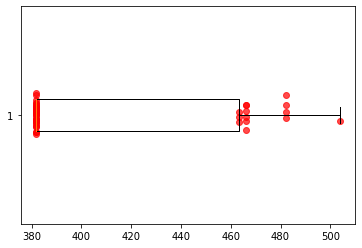

Para el mapa g3:

Iteraciones: 1000:
Media: 85993.23317140405
Desviacion: 4327.1543646324
El tiempo medio ha sido de: 0.04566739082336426 segundos
Han aparecido 1 veces la optima, optima = 77064.97831213883, un 0.02 de las veces


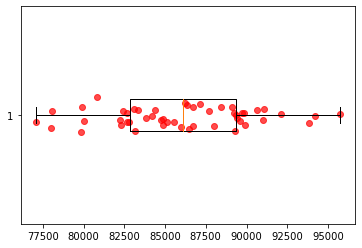

In [426]:
REPETICIONES = 50 #La cantidad de veces que se repetirá
iteraciones = [1000] #Los puntos de parada diferentes

T0 = 20
L = 0.0045

#Primero para el mapa de 8 ciudades
MAPA=g1
NUM_CIUDADES=8
#Definimos una matriz iteraciones x repeticiones para guardar las soluciones y sus costes
soluciones_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
costes_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
tiempos_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
optimas_count_g1 = [0 for _ in range(len(iteraciones))]
optimas_g1 = [0 for _ in range(len(iteraciones))]
#Repetiremos el experimento cambiando MAX_IT ( en este caso solo hay una)
for i in range(len(iteraciones)):
    MAX_IT = iteraciones[i]
    Primer_apartado = TempleSimuladoBasico(NUM_CIUDADES, MAPA, MAX_IT, L, T0)
    optima = float('inf')
    for j in range(REPETICIONES):
        inicio = time.time()
        soluciones_g1[i][j] = Primer_apartado()
        fin = time.time()
        tiempos_g1[i][j] = fin - inicio
        costes_g1[i][j] = funcion_coste(soluciones_g1[i][j][1], MAPA)
        #Vemos si hemos llegado a una solución mejor que la óptima que teníamos hasta el momento
        if costes_g1[i][j] < optima:
            optima = costes_g1[i][j]
            optimas_count_g1[i] = 1
        elif costes_g1[i][j] == optima:
            optimas_count_g1[i] += 1
    optimas_g1[i] = optima
            
        
#Repetimos el mismo proceso para el mapa de 120 ciudades      
MAPA = g3
NUM_CIUDADES = 120
soluciones_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
costes_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
tiempos_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
optimas_count_g3 = [0 for _ in range(len(iteraciones))]
optimas_g3 = [0 for _ in range(len(iteraciones))]
for i in range(len(iteraciones)):
    MAX_IT = iteraciones[i]
    Primer_apartado = TempleSimuladoBasico(NUM_CIUDADES, MAPA, MAX_IT, L, T0)
    optima = float('inf')
    for j in range(REPETICIONES):
        inicio = time.time()
        soluciones_g3[i][j] = Primer_apartado()
        fin = time.time()
        tiempos_g3[i][j] = fin-inicio
        costes_g3[i][j] = funcion_coste(soluciones_g3[i][j][1], MAPA)
        if costes_g3[i][j] < optima:
            optima = costes_g3[i][j]
            optimas_count_g3[i] = 1
        elif costes_g3[i][j] == optima:
            optimas__countg3[i] += 1
    optimas_g3[i] = optima

#Imprimiremos media y desviacion para cada version, y un boxplot donde aparecen los puntos con una dispersion vertical aleatoria
print("Para el mapa g1:\n")
for i in range(len(iteraciones)):
    print(f"Iteraciones: {iteraciones[i]}:")
    print(f"Media: {sum(costes_g1[i])/len(costes_g1[i])}")
    print(f"Desviacion: {statistics.stdev(costes_g1[i])}")
    print(f"El tiempo medio ha sido de: {sum(tiempos_g1[i])/len(tiempos_g1[i])} segundos")
    print(f"Han aparecido {optimas_count_g1[i]} veces la optima, optima = {optimas_g1[i]}, un {optimas_count_g1[i]/REPETICIONES} de las veces.") #Considerando la óptima como el mínimo obtenido
    plt.boxplot(costes_g1[i], vert=False)
    y = np.random.normal(1,0.04, len(costes_g1[i]))
    plt.scatter(costes_g1[i], y, color = 'red', alpha = 0.7)
    plt.show()
    
print("Para el mapa g3:\n")
for i in range(len(iteraciones)):
    print(f"Iteraciones: {iteraciones[i]}:")
    print(f"Media: {sum(costes_g3[i])/len(costes_g3[i])}")
    print(f"Desviacion: {statistics.stdev(costes_g3[i])}")
    print(f"El tiempo medio ha sido de: {sum(tiempos_g3[i])/len(tiempos_g3[i])} segundos")
    print(f"Han aparecido {optimas_count_g3[i]} veces la optima, optima = {optimas_g3[i]}, un {optimas_count_g3[i]/REPETICIONES} de las veces") #Considerando la óptima como el mínimo obtenido
    plt.boxplot(costes_g3[i], vert=False)
    y = np.random.normal(1,0.04, len(costes_g3[i]))
    plt.scatter(costes_g3[i], y, color = 'red', alpha = 0.7)
    plt.show()

### Ajuste dinámico de temperatura inicial


En tu implementación has establecido la temperatura inicial siguiendo un valor fijo completamente arbitrario. Esto puede no resultar siempre adecuado, y suele ser más conveniente disponer de un ajuste de la temperatura inicial (T0) que tenga en cuenta la instancia del problema a resolver. 

Modifica la implementación anterior para que puedas parametrizar el valor inicial del parámetro de control T0 utilizando la siguiente fórmula:

    𝑇0 = (−𝜇/ln(𝜙))·𝐶(𝑆0), que permite aceptar (con una probabilidad 𝜙) soluciones siguientes que empeoren en μ (tanto por uno) a S0 (esto es, que sean (1+ μ) veces peores).

En la fórmula, C(S0) es el coste de la solución inicial, con valores por defecto 𝜙=0.50 y 𝜇=0.01.


In [5]:
#Lo que haré será modificar la clase TempleSimuladoBasico para que si recibe un T0 lo utilice directamente,
#Y si no lo recibe lo calcule con una nueva funcion auxiliar.

def calcula_t0(o, u, s0, mapa):
    return (-u/math.log(o))*funcion_coste(s0, mapa)

#Esta será la clase cuya llamada 
class TempleSimuladoBasico:
    def __init__(self, num_ciudades, mapa, max_it, l, t0=None, o=None, u=None):
        self.num_ciudades = num_ciudades
        self.mapa = mapa
        self.max_it = max_it
        self.t0 = t0
        self.l = l
        self.o = o
        self.u = u
        
    
    #Implementa el algoritmo del temple simulado básico
    def __call__(self):
        s_in = solucion_inicial(self.num_ciudades)
        #Si t0 sigue con el valor None significa que queremos que se inicialice siguiendo los valores de o y u
        if self.t0 is None:
            t0 = calcula_t0(self.o, self.u, s_in, self.mapa)
        else:
            t0 = self.t0
        t = t0
        cost_in = funcion_coste(s_in, self.mapa)
        s_act = s_in
        s_out = s_act
        for i in range(0,self.max_it):
            for j in range(0,velocidad_enfriamiento()): #Cada 1 iteracion se enfriaria
                s_cand = siguiente_solucion(s_act)       
                dif_cost = diferencia_coste(s_cand,s_act, self.mapa)
                if dif_cost<0:
                    s_act = s_cand
                    s_out = s_act
                else:
                    accept = decision(t, dif_cost)
                    #print(accept)
                    if accept==1:
                        s_act = s_cand
            t = mecanismo_enfriamiento(i, t0, self.l)
        
        return (s_in, s_out, t0)
        #print(f' s_in = {s_in}, coste_in = {cost_in}, s_out = {s_act}, coste_out = {funcion_coste(s_act, self.mapa)}')
    
    

In [429]:
NUM_CIUDADES = 8
MAPA = g1
MAX_IT = 100000
o = 0.5
u = 0.01
T0 = 20
L = 0.0045
Primer_apartado = TempleSimuladoBasico(NUM_CIUDADES, MAPA, MAX_IT, L, o=o, u=u)

s_in, s_out, t0 = Primer_apartado()
print(f't0 = {t0}, s_in = {s_in}, coste = {funcion_coste(s_in, MAPA)}, s_out = {s_out}, coste = {funcion_coste(s_out, MAPA)}')
    


t0 = 10.549490853670198, s_in = [4, 7, 5, 3, 6, 1, 2], coste = 731.2349841564428, s_out = [1, 2, 3, 7, 6, 5, 4], coste = 479.98478395724294


Para el mapa g1:

Iteraciones: 1000:
Media: 440.6763274101272
Desviacion: 50.04248090571534
El tiempo medio ha sido de: 0.0058346414566040035 segundos
Han aparecido 20 veces la optima, optima = 381.6699617675482, un 0.4 de las veces.


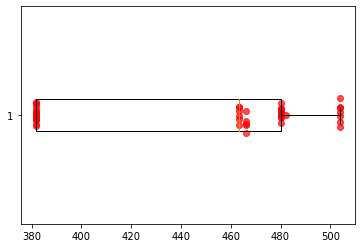

Para el mapa g3:

Iteraciones: 1000:
Media: 87737.72712358757
Desviacion: 3235.6986858372243
El tiempo medio ha sido de: 0.045265059471130374 segundos
Han aparecido 1 veces la optima, optima = 79177.42063360689, un 0.02 de las veces


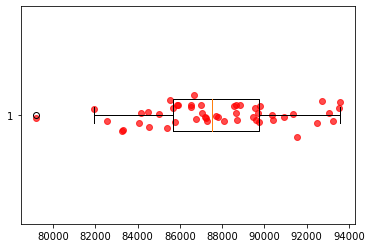

/tmp/ipykernel_160/1894021707.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matriz_g1 = np.array(soluciones_g1)
/tmp/ipykernel_160/1894021707.py:89: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matriz_g3 = np.array(soluciones_g3)


In [430]:
REPETICIONES = 50 #La cantidad de veces que se repetirá
iteraciones = [1000] #Los puntos de parada diferentes

Phi = 0.1
Mu = 0.0001
L = 0.0045

#Primero para el mapa de 8 ciudades
MAPA=g1
NUM_CIUDADES=8
#Definimos una matriz iteraciones x repeticiones para guardar las soluciones y sus costes
soluciones_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
costes_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
tiempos_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
optimas_count_g1 = [0 for _ in range(len(iteraciones))]
optimas_g1 = [0 for _ in range(len(iteraciones))]
#Repetiremos el experimento cambiando MAX_IT
for i in range(len(iteraciones)):
    MAX_IT = iteraciones[i]
    Primer_apartado = TempleSimuladoBasico(NUM_CIUDADES, MAPA, MAX_IT, L, o=Phi, u=Mu)
    optima = float('inf')
    for j in range(REPETICIONES):
        inicio = time.time()
        soluciones_g1[i][j] = Primer_apartado()
        fin = time.time()
        tiempos_g1[i][j] = fin - inicio
        costes_g1[i][j] = funcion_coste(soluciones_g1[i][j][1], MAPA)
        #Vemos si hemos llegado a una solución mejor que la óptima que teníamos hasta el momento
        if costes_g1[i][j] < optima:
            optima = costes_g1[i][j]
            optimas_count_g1[i] = 1
        elif costes_g1[i][j] == optima:
            optimas_count_g1[i] += 1
    optimas_g1[i] = optima
            
        
#Repetimos el mismo proceso para el mapa de 120 ciudades      
MAPA = g3
NUM_CIUDADES = 120
soluciones_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
costes_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
tiempos_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(len(iteraciones))]
optimas_count_g3 = [0 for _ in range(len(iteraciones))]
optimas_g3 = [0 for _ in range(len(iteraciones))]
for i in range(len(iteraciones)):
    MAX_IT = iteraciones[i]
    Primer_apartado = TempleSimuladoBasico(NUM_CIUDADES, MAPA, MAX_IT, L, o=Phi, u=Mu)
    optima = float('inf')
    for j in range(REPETICIONES):
        inicio = time.time()
        soluciones_g3[i][j] = Primer_apartado()
        fin = time.time()
        tiempos_g3[i][j] = fin-inicio
        costes_g3[i][j] = funcion_coste(soluciones_g3[i][j][1], MAPA)
        if costes_g3[i][j] < optima:
            optima = costes_g3[i][j]
            optimas_count_g3[i] = 1
        elif costes_g3[i][j] == optima:
            optimas__countg3[i] += 1
    optimas_g3[i] = optima

#Imprimiremos media y desviacion para cada version, y un boxplot donde aparecen los puntos con una dispersion vertical aleatoria
print("Para el mapa g1:\n")
for i in range(len(iteraciones)):
    print(f"Iteraciones: {iteraciones[i]}:")
    print(f"Media: {sum(costes_g1[i])/len(costes_g1[i])}")
    print(f"Desviacion: {statistics.stdev(costes_g1[i])}")
    print(f"El tiempo medio ha sido de: {sum(tiempos_g1[i])/len(tiempos_g1[i])} segundos")
    print(f"Han aparecido {optimas_count_g1[i]} veces la optima, optima = {optimas_g1[i]}, un {optimas_count_g1[i]/REPETICIONES} de las veces.") #Considerando la óptima como el mínimo obtenido
    plt.boxplot(costes_g1[i], vert=False)
    y = np.random.normal(1,0.04, len(costes_g1[i]))
    plt.scatter(costes_g1[i], y, color = 'red', alpha = 0.7)
    plt.show()
    
print("Para el mapa g3:\n")
for i in range(len(iteraciones)):
    print(f"Iteraciones: {iteraciones[i]}:")
    print(f"Media: {sum(costes_g3[i])/len(costes_g3[i])}")
    print(f"Desviacion: {statistics.stdev(costes_g3[i])}")
    print(f"El tiempo medio ha sido de: {sum(tiempos_g3[i])/len(tiempos_g3[i])} segundos")
    print(f"Han aparecido {optimas_count_g3[i]} veces la optima, optima = {optimas_g3[i]}, un {optimas_count_g3[i]/REPETICIONES} de las veces") #Considerando la óptima como el mínimo obtenido
    plt.boxplot(costes_g3[i], vert=False)
    y = np.random.normal(1,0.04, len(costes_g3[i]))
    plt.scatter(costes_g3[i], y, color = 'red', alpha = 0.7)
    plt.show()
    
#Ahora convertimos todo en array de numpy y lo guardamos el un archivo para no perderlo:
matriz_g1 = np.array(soluciones_g1)
matriz_g3 = np.array(soluciones_g3)

tiempos_m_g1 = np.array(tiempos_g1)
tiempos_m_g3 = np.array(tiempos_g3)

np.save('soluciones_g1_2.npy', matriz_g1)
np.save('soluciones_g3_2.npy', matriz_g3)
np.save('tiempos_g1_2.npy', tiempos_m_g1)
np.save('tiempos_g3_2.npy', tiempos_m_g3)

❓ **Pregunta 3.1**. Confecciona una tabla que muestre la relación de 𝐶(𝑆0), 𝜙 y 𝜇 con T0 para los dos problemas utilizados anteriormente (ciudades gallegas y ciudades USA). Entonces, amplia de manera razonada la tabla con variaciones de 𝜙 y 𝜇 para cada uno de los problemas. ¿Qué combinación de 𝜙 y 𝜇 da mayor/menor T0?

❓ **Pregunta 3.2**. Escoge 4 combinaciones variadas de parámetros (incluidos los que regulan el mecanismo de enfriamiento, e.g., 𝜆). Ejecuta el algoritmo de Temple Simulado con esas combinaciones. Guarda los resultados en una celda, y discute los resultados obtenidos en cuanto a la calidad de las soluciones obtenidas.



Primero haremos una gráfica en 3d y después una tabla con un gradiente. Para estas, fijaremos el valor del coste C(S0) a 700 y calcularemos el valor de T0 en función de Mu y Phi. Realmente no es relevante de que mapa se trate, pues las conclusiones serán las mismas. 

<IPython.core.display.Javascript object>


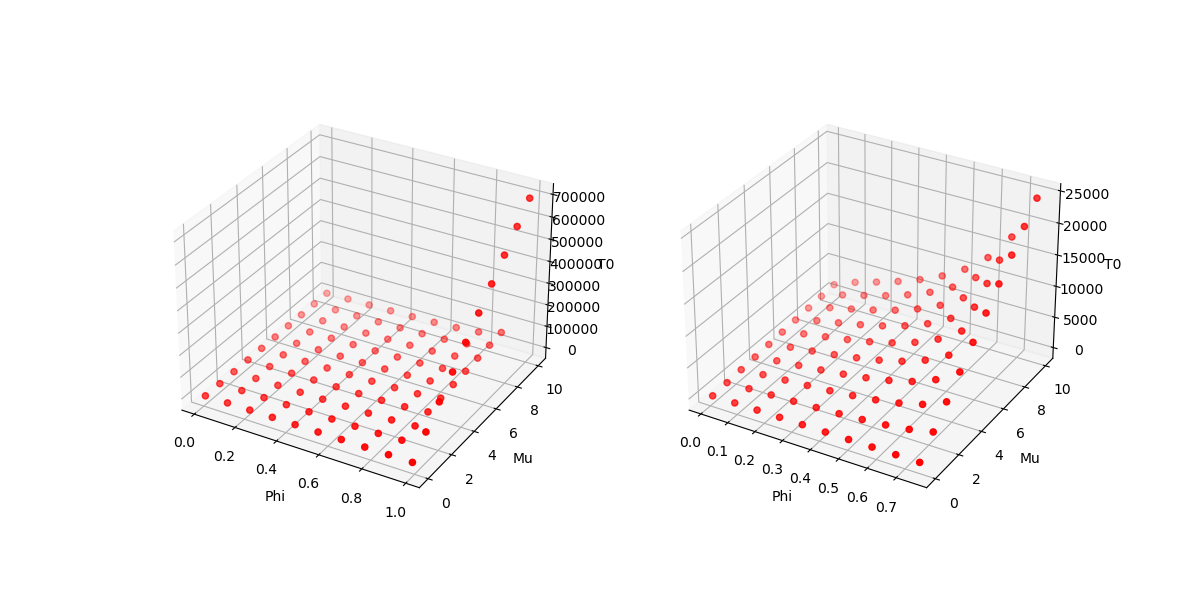

In [115]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar datos de ejemplo
o = np.linspace(0.01, 0.99, 10)
u = np.linspace(0, 10, 10)
o, u = np.meshgrid(o, u)
z = (-u / np.log(o)) * 700

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(o, u, z, c='r', marker='o')

# Configurar etiquetas de los ejes
ax.set_xlabel('Phi')
ax.set_ylabel('Mu')
ax.set_zlabel('T0')

#Ahora un gráfico evitando valores de phi proximos a 1.0

o = np.linspace(0.01, 0.75, 10)
u = np.linspace(0, 10, 10)
o, u = np.meshgrid(o, u)
z = (-u / np.log(o)) * 700

ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(o, u, z, c='r', marker='o')

# Configurar etiquetas de los ejes
ax1.set_xlabel('Phi')
ax1.set_ylabel('Mu')
ax1.set_zlabel('T0')

plt.show()


In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir los rangos y pasos para Mu y Phi
mu_range = np.arange(0.1, 1.0, 0.1)
phi_range = np.arange(0.1, 1.0, 0.1)

# Crear una matriz para almacenar los valores de T0
t0_values = np.zeros((len(mu_range), len(phi_range)))

# Calcular los valores de T0 y llenar la matriz
for i, mu in enumerate(mu_range):
    for j, phi in enumerate(phi_range):
        t0_values[i, j] = (-mu / np.log(phi)) * 700

# Crear un DataFrame de pandas para los valores de T0
df = pd.DataFrame(t0_values, index=mu_range, columns=phi_range)

# Crear un mapa de colores de gradiente para el DataFrame
cmap = plt.cm.YlGn

# Crear la tabla de colores de gradiente usando el método styler de pandas
styled_df = df.style.background_gradient(cmap=cmap, axis=None)

# Establecer un encabezado personalizado para la primera columna
styled_df.set_caption('Tabla de Valores de T0 (Mu/Phi)').set_properties(**{'text-align': 'center'})

# Deshabilitar el índice y mostrar la tabla
styled_df


,0.1,0.2,0.30000000000000004,0.4,0.5,0.6,0.7000000000000001,0.8,0.9
0.1,30.400614,43.493445,58.140848,76.394967,100.988653,137.033063,196.257128,313.699408,664.385511
0.2,60.801227,86.986891,116.281696,152.789934,201.977306,274.066126,392.514255,627.398816,1328.771021
0.30000000000000004,91.201841,130.480336,174.422544,229.184900,302.965959,411.099190,588.771383,941.098225,1993.156532
0.4,121.602455,173.973782,232.563393,305.579867,403.954611,548.132253,785.028511,1254.797633,2657.542043
0.5,152.003069,217.467227,290.704241,381.974834,504.943264,685.165316,981.285638,1568.497041,3321.927553
0.6,182.403682,260.960673,348.845089,458.369801,605.931917,822.198379,1177.542766,1882.196449,3986.313064
0.7000000000000001,212.804296,304.454118,406.985937,534.764767,706.920570,959.231443,1373.799894,2195.895858,4650.698575
0.8,243.204910,347.947563,465.126785,611.159734,807.909223,1096.264506,1570.057021,2509.595266,5315.084085
0.9,273.605524,391.441009,523.267633,687.554701,908.897876,1233.297569,1766.314149,2823.294674,5979.469596


Al final, analizando la gráfica y el gradiente de la tabla, lo que vemos es que el valor de T0 aumenta tanto al aumentar Phi como al aumentar Mu. Esto se debe a que, cuantas peores soluciones estemos dispuestos a aceptar (Mu), o mayor sea la probabilidad de aceptar dichas soluciones (Phi), mayor valor inicial tendrá T, lo que significa que al final tendremos mayor probabilidad de aceptar una solución peor que la actual en el algoritmo de Temple Básico Simulado (T0). Cuando aumentamos Phi hasta próximo a 1 lo que vemos es que los valores de T0 crecen enormememnte. Esto se debe a que el logaritmo de un número próximo a 1.0 es cada vez más pequeño en negativo, así, el resultado de la división crece enormemente. Este crecimiento será mayor cuanto mayor sea también el valor de Mu. En la gráfica en 3d de la derecha se ve más claramente lo que comentabamos. En esta, hemos eliminado los valores más altos de phi hasta 0.75 de probabilidad. Así, lo que vemos es como cuando aumentamos tanto Mu como Phi, los valores de T0 aumentan, especialmente cuando combinamos valores altos de ambos parámetros. 

La combinacion de Mu y Phi que dará mayor T0 será aquella con mayor Mu y mayor Phi: 
1. Mu = inf
2. Phi = Tiene a uno por la izquierda

La combinación de Mu y Phi que dará menor T0 será aquella en que Mu sea 0, independientemente del valor de Phi:
1. Mu = 0, T0 será 0 


Ahora lo que haremos será escoger 4 combinaciones de valores de los parámetros Mu, Phi, l y velocidad de enfriamiento. Los ejecutaremos y representaremos igual que hacíamos antes. 

In [7]:
#Como vamos a jugar con la velocidad, añadimos este parámetro a la clase TempleSimuladoBasico
class TempleSimuladoBasico:
    def __init__(self, num_ciudades, mapa, max_it, l, t0=None, o=None, u=None, vel=1):
        self.num_ciudades = num_ciudades
        self.mapa = mapa
        self.max_it = max_it
        self.t0 = t0
        self.l = l
        self.o = o
        self.u = u
        self.vel = vel
        
    
    #Implementa el algoritmo del temple simulado básico
    def __call__(self):
        s_in = solucion_inicial(self.num_ciudades)
        #Si t0 sigue con el valor None significa que queremos que se inicialice siguiendo los valores de o y u
        if self.t0 is None:
            t0 = calcula_t0(self.o, self.u, s_in, self.mapa)
        else:
            t0 = self.t0
        t = t0
        cost_in = funcion_coste(s_in, self.mapa)
        s_act = s_in
        s_out = s_act
        for i in range(0,self.max_it):
            for j in range(0,self.vel): #Cada 1 iteracion se enfriaria
                s_cand = siguiente_solucion(s_act)       
                dif_cost = diferencia_coste(s_cand,s_act, self.mapa)
                if dif_cost<0:
                    s_act = s_cand
                    s_out = s_act
                else:
                    accept = decision(t, dif_cost)
                    #print(accept)
                    if accept==1:
                        s_act = s_cand
            t = mecanismo_enfriamiento(i, t0, self.l)
        
        return (s_in, s_out, t0)

Para el mapa g1:

Combinacion: {'Mu': 0.001, 'Phi': 0.2, 'Max_it': 1000, 'l': 0.09, 'vel': 2}:
Media: 437.87371719526413
Desviacion: 47.55666297814633
El tiempo medio ha sido de: 0.011003932952880859 segundos
Han aparecido 20 veces la optima, optima = 381.6699617675482, un 0.4 de las veces.


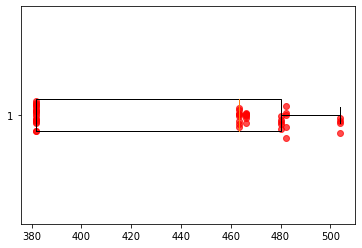

Combinacion: {'Mu': 0.1, 'Phi': 0.5, 'Max_it': 1000, 'l': 0.0045, 'vel': 10}:
Media: 383.30052654846617
Desviacion: 11.529834137511896
El tiempo medio ha sido de: 0.051451072692871094 segundos
Han aparecido 49 veces la optima, optima = 381.6699617675482, un 0.98 de las veces.


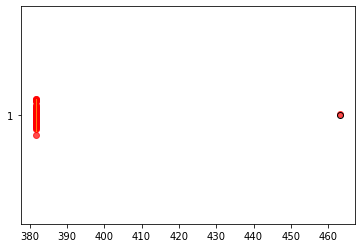

Combinacion: {'Mu': 0.5, 'Phi': 0.8, 'Max_it': 1000, 'l': 0.09, 'vel': 2}:
Media: 424.4371845947591
Desviacion: 51.46278808120333
El tiempo medio ha sido de: 0.01070258617401123 segundos
Han aparecido 29 veces la optima, optima = 381.6699617675482, un 0.58 de las veces.


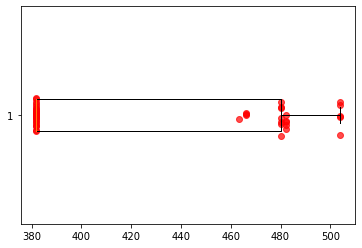

Combinacion: {'Mu': 0.0001, 'Phi': 0.5, 'Max_it': 1000, 'l': 0.0045, 'vel': 10}:
Media: 443.2921695417013
Desviacion: 48.53022690962112
El tiempo medio ha sido de: 0.05171382427215576 segundos
Han aparecido 18 veces la optima, optima = 381.6699617675482, un 0.36 de las veces.


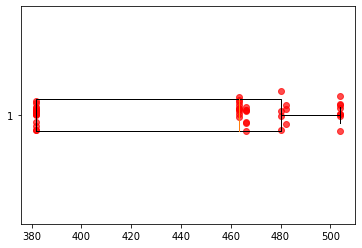

Para el mapa g3:

Combinacion: {'Mu': 0.001, 'Phi': 0.2, 'Max_it': 1000, 'l': 0.09, 'vel': 2}:
Media: 73892.33133264333
Desviacion: 3683.6592854814226
El tiempo medio ha sido de: 0.08663818359375 segundos
Han aparecido 1 veces la optima, optima = 65350.655707370825, un 0.02 de las veces


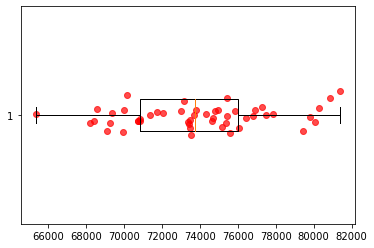

Combinacion: {'Mu': 0.1, 'Phi': 0.5, 'Max_it': 1000, 'l': 0.0045, 'vel': 10}:
Media: 80417.01940539796
Desviacion: 4828.0416280420095
El tiempo medio ha sido de: 0.42380797386169433 segundos
Han aparecido 1 veces la optima, optima = 71962.55451519517, un 0.02 de las veces


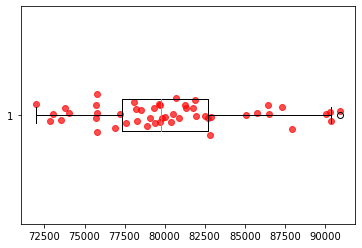

Combinacion: {'Mu': 0.5, 'Phi': 0.8, 'Max_it': 1000, 'l': 0.09, 'vel': 2}:
Media: 73650.04866400502
Desviacion: 4122.96685910713
El tiempo medio ha sido de: 0.08540724754333497 segundos
Han aparecido 1 veces la optima, optima = 62168.548544021076, un 0.02 de las veces


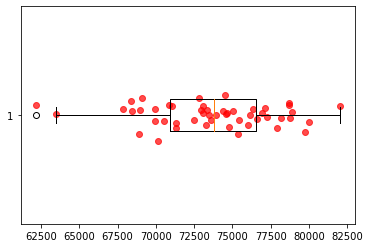

Combinacion: {'Mu': 0.0001, 'Phi': 0.5, 'Max_it': 1000, 'l': 0.0045, 'vel': 10}:
Media: 53051.55072727942
Desviacion: 2946.1769519003656
El tiempo medio ha sido de: 0.4258716344833374 segundos
Han aparecido 1 veces la optima, optima = 47089.60632430301, un 0.02 de las veces


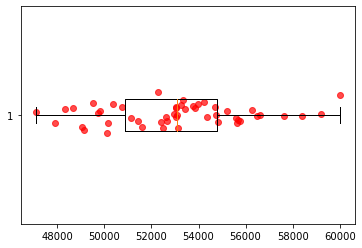

In [8]:
#Probaremos 4 opciones diferentes de los parámetros
c1 = {"Mu": 0.001, "Phi": 0.2, "Max_it": 1000, "l": 0.09, "vel": 2}
c2 = {"Mu": 0.1, "Phi": 0.5, "Max_it": 1000, "l": 0.0045, "vel": 10}
c3 = {"Mu": 0.5, "Phi": 0.8, "Max_it": 1000, "l": 0.09, "vel": 2}
c4 = {"Mu": 0.0001, "Phi": 0.5, "Max_it": 1000, "l": 0.0045, "vel": 10}

combs = [c1,c2,c3,c4]

REPETICIONES = 50
NUM_COMB = 4


soluciones_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(NUM_COMB)]
costes_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(NUM_COMB)]
tiempos_g1 = [[0 for _ in range(REPETICIONES)] for _ in range(NUM_COMB)]
optimas_count_g1 = [0 for _ in range(NUM_COMB)]
optimas_g1 = [0 for _ in range(NUM_COMB)]

soluciones_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(NUM_COMB)]
costes_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(NUM_COMB)]
tiempos_g3 = [[0 for _ in range(REPETICIONES)] for _ in range(NUM_COMB)]
optimas_count_g3 = [0 for _ in range(NUM_COMB)]
optimas_g3 = [0 for _ in range(NUM_COMB)]

for i in range(NUM_COMB):
    MAPA=g1
    NUM_CIUDADES=8
    
    Primer_apartado = TempleSimuladoBasico(NUM_CIUDADES, MAPA, combs[i]["Max_it"], l=combs[i]["l"], u = combs[i]["Mu"], o = combs[i]["Phi"], vel = combs[i]["vel"])
    optima = float('inf')
    for j in range(REPETICIONES):
        inicio = time.time()
        soluciones_g1[i][j] = Primer_apartado()
        fin = time.time()
        tiempos_g1[i][j] = fin - inicio
        costes_g1[i][j] = funcion_coste(soluciones_g1[i][j][1], MAPA)
        #Vemos si hemos llegado a una solución mejor que la óptima que teníamos hasta el momento
        if costes_g1[i][j] < optima:
            optima = costes_g1[i][j]
            optimas_count_g1[i] = 1
        elif costes_g1[i][j] == optima:
            optimas_count_g1[i] += 1
    optimas_g1[i] = optima
    
    MAPA = g3
    NUM_CIUDADES = 120
    
    Primer_apartado = TempleSimuladoBasico(NUM_CIUDADES, MAPA, combs[i]["Max_it"], l=combs[i]["l"], u = combs[i]["Mu"], o = combs[i]["Phi"], vel = combs[i]["vel"])
    optima = float('inf')
    for j in range(REPETICIONES):
        inicio = time.time()
        soluciones_g3[i][j] = Primer_apartado()
        fin = time.time()
        tiempos_g3[i][j] = fin - inicio
        costes_g3[i][j] = funcion_coste(soluciones_g3[i][j][1], MAPA)
        #Vemos si hemos llegado a una solución mejor que la óptima que teníamos hasta el momento
        if costes_g3[i][j] < optima:
            optima = costes_g3[i][j]
            optimas_count_g3[i] = 1
        elif costes_g3[i][j] == optima:
            optimas_count_g3[i] += 1
    optimas_g3[i] = optima
    
#Imprimiremos media y desviacion para cada version, y un boxplot donde aparecen los puntos con una dispersion vertical aleatoria
print("Para el mapa g1:\n")
for i in range(NUM_COMB):
    print(f"Combinacion: {combs[i]}:")
    print(f"Media: {sum(costes_g1[i])/len(costes_g1[i])}")
    print(f"Desviacion: {statistics.stdev(costes_g1[i])}")
    print(f"El tiempo medio ha sido de: {sum(tiempos_g1[i])/len(tiempos_g1[i])} segundos")
    print(f"Han aparecido {optimas_count_g1[i]} veces la optima, optima = {optimas_g1[i]}, un {optimas_count_g1[i]/REPETICIONES} de las veces.") #Considerando la óptima como el mínimo obtenido
    plt.boxplot(costes_g1[i], vert=False)
    y = np.random.normal(1,0.04, len(costes_g1[i]))
    plt.scatter(costes_g1[i], y, color = 'red', alpha = 0.7)
    plt.show()
    
print("Para el mapa g3:\n")
for i in range(NUM_COMB):
    print(f"Combinacion: {combs[i]}:")
    print(f"Media: {sum(costes_g3[i])/len(costes_g3[i])}")
    print(f"Desviacion: {statistics.stdev(costes_g3[i])}")
    print(f"El tiempo medio ha sido de: {sum(tiempos_g3[i])/len(tiempos_g3[i])} segundos")
    print(f"Han aparecido {optimas_count_g3[i]} veces la optima, optima = {optimas_g3[i]}, un {optimas_count_g3[i]/REPETICIONES} de las veces") #Considerando la óptima como el mínimo obtenido
    plt.boxplot(costes_g3[i], vert=False)
    y = np.random.normal(1,0.04, len(costes_g3[i]))
    plt.scatter(costes_g3[i], y, color = 'red', alpha = 0.7)
    plt.show()
    

La primera conclusión que podemos sacar es que los valores de Mu = 0.01 y Phi = 0.5 que se nos habían dado como primera introducción al ajuste de T0 en función del coste de la solución inicial no eran los más óptimos para nuestros problemas. Antes de este ajuste, teníamos un T0=20. Con el ajuste, los valores de T0 para el mapa de 0 localizaciones estaban en el rango de 7 a 12 aproximádamente. Resulta que unos valores de Mu mayores, como 0.1, hacen que el valor de T0 aumente, mejorando bastante el rendimiento del algoritmo. Así, por ejemplo para Mu=0.1 y Phi=0.5 conseguimos un 98% de aparición de la solución óptima. Decir que probablemente esto se trate de un caso extremo, y en otras ejecuciones la proporción no sea tan alta. Para el resto de combinaciones en que aumentamos el valor de lambda o disminuimos el valor de Mu los resultados son muy negativos. 

En el caso del mapa de 120 localizaciones, sucede lo contrario, cuando disminuimos el valor de Mu a 0.0001 obtememos un resultado mejor que cuando Mu es más grande. Esto se debe a que el coste de las soluciones iniciales es mucho mayor que para el caso de las 8 localizaciones. Así, necesitamos un valor de Mu o Phi más pequeño, para disminuir el valor inicial de T0, y así tener una buena inicialización. De no ser así, empezaríamos con un T0 demasiado grande, que aceptaría demasiadas soluciones vecinas generadas. 

Cuando aumentamos la velocidad de enfriamiento, obtenemos mejores resultados porque al final estamos haciendo 10 veces más iteraciones de las 1000 que hacemos con velocidad = 1. Así, al hacer más iteraciones, y especialmente en el mapa de 120 ciudades, el coste temporal de cada iteración es mucho mayor, pero también se tiene más tiempo para recorrer mejor el espacio de búsqueda y encontrar mejores soluciones. 

 
## P1.2: Mejoras del algoritmo de Temple Simulado

En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo con lo visto en las clases expositivas. Podrá modificarse cualquiera de los siguientes parámetros u operadores:
- El valor inicial del parámetro de control (T0).
- El mecanismo de enfriamiento.
- La velocidad de enfriamiento.
- El mecanismo de selección de las soluciones candidatas
- El criterio de parada

**Importante**: Debes mantener una implementación de la versión básica que pueda ser ejecutada en la evaluación. Así que se recomienda que la implementación del algoritmo con las mejoras sea implementada en otra función reservada para la versión mejorada. 

En esta parte implementaremos diversas mejoras. Lo primero que hacemos es redefinir todas las funciones que teníamos y una nueva clase que será TempleSimuladoMejorado. De este TempleSimuladoMejorado implementaremos varias versiones que tienen diferentes mejoras. Las mejoras que implementaremos son:
1. Velocidad de enfriamiento y parada cuando no se haya aceptado ninguna solucion en toda la velocidad
2. Modificación del mecanismo de creación de siguientes soluciones para que en vez de intercambiar dos elementos se inserte uno en otro posición del vector
3. Definición de la velocidad de enfriamiento en función de la cantidad de soluciones generadas y las soluciones aceptadas

Finalmente, juntaremos las mejoras 2 y 3 para conseguir el mejor rendimiento posible. 

In [42]:
#Determina aleatoriamente cuando es la solucion de la que se parte en el problema
def solucion_inicial(num_ciudades):
    lista = [i for i in range(1,num_ciudades)]
    random.shuffle(lista)
    return lista

#Determina el valor de la temperatura (t) según la iteración (k)
def mecanismo_enfriamiento(k, t0, l):
    return t0 * math.exp(-l*k)

#Recibe la probabilidad de aceptar un resultado peor segun el valor de la temperatura (prob),
#Devuelve 0 o 1 indicando si lo acepta (1) o no (0)
def decision(t, dif_cost): 
    if random.uniform(0,1)<math.exp(-dif_cost/t):
        return 1
    return 0
    #return random.choices([0,1], weights=[1-prob, prob])

#Devuelve el siguiente vecino aleatorio a partir de la solución dada (s_act) intercambiando dos posiciones entre ellas
def siguiente_solucion(s_act):
    s_aux = s_act[:]
    ind1 = random.randint(0,len(s_act)-1)
    while True:
        ind2 = random.randint(0,len(s_act)-1) 
        if (ind2!=ind1): #Para evitar que las dos posiciones del vector sean las mismas
            break

    aux = s_aux[ind1]
    s_aux[ind1] = s_aux[ind2]
    s_aux[ind2] = aux

    return s_aux

#Devuelve la diferencia de coste entre dos soluciones (s_act y s_cand)
def diferencia_coste(s_act, s_cand, mapa):
    return funcion_coste(s_act, mapa) - funcion_coste(s_cand, mapa)

#Devuelve el coste de una solución dada (s) recorriendo la lista y sumando el coste de cada paso
def funcion_coste(s, mapa):
    cost_tot = 0
    cost_tot += mapa.distancia(0,s[0])
    for i in range(len(s)-1):
        cost_tot += mapa.distancia(s[i], s[i+1])
    cost_tot += mapa.distancia(s[len(s)-1], 0)
    return cost_tot

#Determina cada cuanto tiempo se modifica el valor de la temperatura
def velocidad_enfriamiento(vel):
    return vel

def calcula_t0(o, u, s0, mapa):
    return (-u/math.log(o))*funcion_coste(s0, mapa)

<h3> Implementacion mejora Vel=100</h3>
En esta primera mejora se utilizará una velocidad de enfriamiento diferente de 1. 100. Además, la condición de parada del algoritmo será que ninguna solución vecina haya sido aceptada en las 100 iteraciones del bucle antes de enfriar. 

In [35]:
#Esta es la mejora haciendo que enfrie por cada 100 generados
class TempleSimuladoMejorado:
    def __init__(self, num_ciudades, mapa, l, t0=None, o=None, u=None, vel=1, ):
        self.num_ciudades = num_ciudades
        self.mapa = mapa
        self.t0 = t0
        self.l = l
        self.o = o
        self.u = u
        self.vel = vel
        
    
    #Implementa el algoritmo del temple simulado básico
    def __call__(self):
        s_in = solucion_inicial(self.num_ciudades)
        #Si t0 sigue con el valor None significa que queremos que se inicialice siguiendo los valores de o y u
        if self.t0 is None:
            t0 = calcula_t0(self.o, self.u, s_in, self.mapa)
        else:
            t0 = self.t0
        t = t0
        cost_in = funcion_coste(s_in, self.mapa)
        s_act = s_in
        s_out = s_act
        
        sin_aceptar_peor = -1
        
        i = 0
        
        
        
        while sin_aceptar_peor != velocidad_enfriamiento(self.vel):
            sin_aceptar_peor = 0
            for j in range(0,velocidad_enfriamiento(self.vel)): #Cada 1 iteracion se enfriaria
                s_cand = siguiente_solucion(s_act)       
                dif_cost = diferencia_coste(s_cand,s_act, self.mapa)
                if dif_cost<0:
                    s_act = s_cand
                    s_out = s_act
                else:
                    accept = decision(t, dif_cost)
                    if accept==1:
                        s_act = s_cand
                    else:
                        sin_aceptar_peor += 1
            t = mecanismo_enfriamiento(i, t0, self.l)
            i+=1
            
        #print(f"i = {i}")
        
        return (s_in, s_out)
    
    

El resultado de esta ejecución es:

|  | Media | Desviacion | Tiempo | Optima | 
|-----------|-----------|-----------|-----------|-----------|
| **V=100**   | 44831.18    | 3385.18    | 2.907    | 40198.89   | 


<h3>Implementacion mejora Insercion</h3>
La siguiente mejora que probaremos será cambiar el mecanismo de generación de soluciones vecinas. En vez de intercambiar dos elementos, insertaremos uno en otra posición. 

In [55]:
MAPA = g3

def siguiente_solucion(s_act):
    
    s_aux = s_act[:]
    ind1 = random.randint(0, len(s_act)-1)
    
    elem = s_aux[ind1]
    s_aux.pop(ind1)
    
    while True:
        ind2 = random.randint(0, len(s_act)-1)
        if (ind2!=ind1):
            break
            
    s_aux.insert(ind2, elem)
    
    return s_aux

Utilizando la clase básica TempleSimuladoBasico y esta función de siguiente_solución obtendríamos los siguientes resultados:

|  | Media | Desviacion | Tiempo | Optima | 
|-----------|-----------|-----------|-----------|-----------|
| **Insercion**   | 82867.9    | 4110.34    | 0.046    | 74760.46  | 

<h3> Implementacion mejora Max(10)</h3>
La siguiente mejora que probaremos será modificar la velocidad de enfriamiento para salir del bucle en caso de que se cumpla que se ha generado un número máximo de vecinos o se han aceptado un número máximo de soluciones. En general, max_aceptadas = max_generados * 0.1. En nuestro caso, probaremos con max_generados = 10

In [ ]:
class TempleSimuladoMejorado:
    def __init__(self, num_ciudades, mapa, l, t0=None, o=None, u=None, vel=1, ):
        self.num_ciudades = num_ciudades
        self.mapa = mapa
        self.t0 = t0
        self.l = l
        self.o = o
        self.u = u
        self.vel = vel
        
    
    #Implementa el algoritmo del temple simulado básico
    def __call__(self):
        s_in = solucion_inicial(self.num_ciudades)
        #Si t0 sigue con el valor None significa que queremos que se inicialice siguiendo los valores de o y u
        if self.t0 is None:
            t0 = calcula_t0(self.o, self.u, s_in, self.mapa)
        else:
            t0 = self.t0
        t = t0
        cost_in = funcion_coste(s_in, self.mapa)
        s_act = s_in
        s_out = s_act
        
        max_aceptados = -1
        
        
        for i in range(0,1000):
            sin_aceptar_peor = 0
            max_generados = 0
            max_aceptados = 0
            while max_generados!=10 and max_aceptados!=10*0.1:
                max_generados +=1
                s_cand = siguiente_solucion(s_act)       
                dif_cost = diferencia_coste(s_cand,s_act, self.mapa)
                if dif_cost<0:
                    s_act = s_cand
                    s_out = s_act
                    max_aceptados+=1
                else:
                    accept = decision(t, dif_cost)
                    if accept==1:
                        s_act = s_cand
                        max_aceptados+=1
            t = mecanismo_enfriamiento(i, t0, self.l)
        
        return (s_in, s_out)
    
    

Con esta nueva implementación obtendríamos los resultados:
    
|  | Media | Desviacion | Tiempo | Optima | 
|-----------|-----------|-----------|-----------|-----------|
| **Max(10)**   | 55423.93    | 3805.09    | 0.328    | 45897.16  |

<h3>Implementacion mejora combinada Max(10) e Insercion</h3>
Ahora lo que haremos será combinar las mejoras de **Insercion** y **Max** con distintos valores para encontrar las soluciones mejores, y poder ver los compromisos temporales que se han de asumir.

In [59]:
MAPA = g3

def siguiente_solucion(s_act):
    
    s_aux = s_act[:]
    ind1 = random.randint(0, len(s_act)-1)
    
    elem = s_aux[ind1]
    s_aux.pop(ind1)
    
    while True:
        ind2 = random.randint(0, len(s_act)-1)
        if (ind2!=ind1):
            break
            
    s_aux.insert(ind2, elem)
    
    return s_aux

class TempleSimuladoMejorado:
    def __init__(self, num_ciudades, mapa, l, t0=None, o=None, u=None, vel=1, ):
        self.num_ciudades = num_ciudades
        self.mapa = mapa
        self.t0 = t0
        self.l = l
        self.o = o
        self.u = u
        self.vel = vel
        
    
    #Implementa el algoritmo del temple simulado básico
    def __call__(self):
        s_in = solucion_inicial(self.num_ciudades)
        #Si t0 sigue con el valor None significa que queremos que se inicialice siguiendo los valores de o y u
        if self.t0 is None:
            t0 = calcula_t0(self.o, self.u, s_in, self.mapa)
        else:
            t0 = self.t0
        t = t0
        cost_in = funcion_coste(s_in, self.mapa)
        s_act = s_in
        s_out = s_act
        
        max_aceptados = -1
        
        
        for i in range(0,1000):
            sin_aceptar_peor = 0
            max_generados = 0
            max_aceptados = 0
            while max_generados!=10 and max_aceptados!=10*0.1:
                max_generados +=1
                s_cand = siguiente_solucion(s_act)       
                dif_cost = diferencia_coste(s_cand,s_act, self.mapa)
                if dif_cost<0:
                    s_act = s_cand
                    s_out = s_act
                    max_aceptados+=1
                else:
                    accept = decision(t, dif_cost)
                    if accept==1:
                        s_act = s_cand
                        max_aceptados+=1
            t = mecanismo_enfriamiento(i, t0, self.l)
        
        return (s_in, s_out)
    
    

Probando con diferentes valores para max_generados y max_aceptados obtenemos los siguientes resultados:

|  | Media | Desviacion | Tiempo | Optima | 
|-----------|-----------|-----------|-----------|-----------|
| **Max(10)+Insercion**   | 46065.20    | 2644.42    |   0.334 | 39244.69  |
| **Max(20)+Insercion**   | 36581.46    | 2268.07    | 0.785    | 31176.20  |
| **Max(30)+Insercino**   | 33567.40   | 1876.47    | 1.231    | 29856.35  |
| **Max(50)+Insercion**   | 29683.95    | 1939.23    | 2.191    | 26463.44  |

<h3> Modificaciones que no resultan ser mejora</h3>
Para finalizar, estas son algunas de las mejoras que hemos intentando, pero no que no han dado resultados positivos:
1. Probar diferentes mecanismos de enfriamiento: descenso proporcional, boltzmann y cauchy
2. Modificar el sistema de creación de soluciones vecinas para que intercambiase o no un elemento con el de su izquierda según si la distancia desde este hasta su izquierda era mayor que la distancia desde el de su derecha al de su izquierda. 
3. Modificar el sistema de creación de soluciones para que hasta cierto humbral de t utilizase el intercambio y a partir de ahí la inserción

In [71]:
#Ahora lo que vamos a hacer es definir distintos mecanismos de enfriamiento:
def mecanismo_enfriamiento_descenso_propocional(T, k):
    return T*0.8

def mecanismo_enfriamiento_boltzmann(T0, k):
    return T0/(1+math.log10(k))

def mecanismo_enfriamiento_cauchy(T0, k):
    return T0/(1+k)

In [57]:
MAPA = g3 

def siguiente_solucion(s_act, t):
    
    
    if t>2:
        s_aux = s_act[:]

        ind1 = random.randint(0, len(s_act)-1)

        #print(ind1)

        if ind1 == 0:
            #print(0)
            if MAPA.distancia(0, s_aux[0]) > MAPA.distancia(0, s_aux[1]):
                elem = s_aux[0]
                s_aux[0]=s_aux[1]
                s_aux[1]=elem
        elif ind1 == len(s_act)-1:
            #print("ind1-1")
            if MAPA.distancia(s_aux[ind1-1], s_aux[ind1]) > MAPA.distancia(s_aux[ind1-1], 0):
                elem = s_aux[ind1-1]
                s_aux[ind1-1] = s_aux[ind1]
                s_aux[ind1] = elem

        else:
            #print("normal")
            if MAPA.distancia(s_aux[ind1-1], s_aux[ind1]) > MAPA.distancia(s_aux[ind1-1], s_aux[ind1+1]):
                elem = s_aux[ind1-1]
                s_aux[ind1-1] = s_aux[ind1]
                s_aux[ind1] = elem
    else:
        s_aux = s_act[:]
        ind1 = random.randint(0, len(s_act)-1)

        elem = s_aux[ind1]
        s_aux.pop(ind1)

        while True:
            ind2 = random.randint(0, len(s_act)-1)
            if (ind2!=ind1):
                break

        s_aux.insert(ind2, elem)
            
    
    
    return s_aux

In [396]:
MAPA = g3

def siguiente_solucion(s_act, t):
    
    
    if t>0.3:
        s_aux = s_act[:]
        ind1 = random.randint(0,len(s_act)-1)
        while True:
            ind2 = random.randint(0,len(s_act)-1) 
            if (ind2!=ind1): #Para evitar que las dos posiciones del vector sean las mismas
                break

        aux = s_aux[ind1]
        s_aux[ind1] = s_aux[ind2]
        s_aux[ind2] = aux
    else:
        s_aux = s_act[:]
        ind1 = random.randint(0, len(s_act)-1)

        elem = s_aux[ind1]
        s_aux.pop(ind1)

        while True:
            ind2 = random.randint(0, len(s_act)-1)
            if (ind2!=ind1):
                break

        s_aux.insert(ind2, elem)
            
    
    
    return s_aux

❓ **Pregunta 4**. Implementa un laboratorio para evaluar el impacto de las mejoras consideradas. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? ¿Cuáles no parecen haber funcionado tan bien como esperabas y por qué?  Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas o no para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.

**Importante**: Aunque puedes obtener tantas celdas de ejecución de laboratorio y resultados como necesites, tu informe final en respuestas a la pregunta 4 no debería superar las 1200 palabras.


<h2> INFORME </h2>

En la primera parte de la práctica, implementamos el algoritmo del Temple Simulado desde cero. Este algoritmo busca soluciones en un espacio de búsqueda, mejorándolas gradualmente pero aceptando ocasionalmente soluciones peores para explorar nuevas áreas del espacio. Luego, ajustamos el cálculo de la temperatura inicial (T0) en función del costo de la solución inicial y ciertos parámetros que controlan la disposición a aceptar soluciones peores. Experimentamos con estos parámetros para analizar su efecto en la temperatura inicial.

En la última parte de la práctica, hemos propuesto mejoras en el código base para mejorar el rendimiento del algoritmo. Evaluamos estas mejoras mediante métricas como la media, la desviación estándar, el tiempo promedio por iteración y el valor mínimo obtenido a partir de 50 ejecuciones. Nos enfocamos en el mapa de 120 localizaciones, ya que estos algoritmos deben ser escalables para problemas más grandes, y el mapa de 8 localizaciones ya tenía soluciones óptimas frecuentes. Además, notamos que en el mapa pequeño, las soluciones se concentran en 5 mínimos locales fácilmente identificables en un diagrama de caja.

file:///home/raulsalgado/Escritorio/Inteligentes/P1_TempleSimulado/Boxplotmapa8.png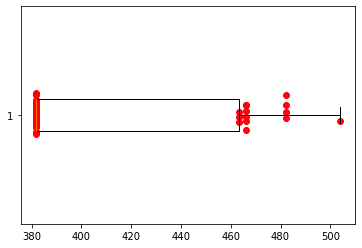

Como bases para nuestra comparativa tomaremos primero la implementación básica del algoritmo, con los valores que nos ha dado en la primera ejecución; y también la mejor combinación de valores que obtuvimos en la pregunta 3.2. En una de estas combinaciones, decidimos ajustar el valor de los parámetros Mu y Phi de manera que diesen un valor de T0 más pequeño del que estaban calculando hasta el momento, así compensábamos lo grande que era el coste de la solución inicial, y obteníamos un T0 con más sentido y que daba mejores resultados que la versión base:

|  | Básica | Mejor combinacion |
|-----------|-----------|-----------|
| **Media**   | 86401.16    | 73650.048    |
| **Desviacion**   | 4489.66    | 4122    |
| **Tiempo**    | 0.046    | 0.085    |
| **Optima**    | 73732.54   | 62168.55   |

**La primera mejora** implementada ajustó la velocidad de enfriamiento y la condición de parada del algoritmo. En lugar de enfriarse en cada iteración, ahora se enfriaba cada 100 iteraciones, lo que permitía mantener una probabilidad más alta de aceptar soluciones peores durante más tiempo, equilibrando la exploración y explotación del espacio de búsqueda. La condición de parada se modificó para mejorar la explotación de la zona en la que se encontraba el algoritmo, deteniéndolo solo cuando no se aceptaban soluciones durante las últimas 100 iteraciones, indicando que quedaban pocas opciones por explorar en esa zona.

El resultado de implementar esta mejora es el siguiente:

|  | Media | Desviacion | Tiempo | Optima | 
|-----------|-----------|-----------|-----------|-----------|
| **V=100**   | 44831.18    | 3385.18    | 2.907    | 40198.89   | 

Es cierto que se ha logrado disminuir mucho la media de coste de las soluciones finales sobre la implementación básica; al igual que se ha reducido bastante la menor solución obtenida. Sin embargo, lo que se ha visto más perjudicado ha sido el tiempo de ejecución, aumentando en un 6319%. Poniéndo estos datos en contexto con el resto de resultados para las otras mejoras entenderemos si realmente merece o no la pena; pero en principio, el objetivo es conseguir un mejor resultado sin perjudicar tanto al tiempo. 

Para ello, con la **siguiente mejora** que mencionaremos, perseguimos una mejora moderada sobre la implementación básica, pero que mantenga su tiempo de ejecución. Para ello, utilizaremos un nuevo mecanismo de generación de soluciones vecinas que tiene un coste computacional igual que la que teníamos hasta el momento (intercambio de dos posiciones). Esta consistirá en insertar un elemento aleatorio del vector en una posición nueva. Con este mecanismo, se nos ocurre que tal vez, cuando estamos con una configuración del vector que representa la solución próxima a un mínimo, este movimiento de insertar pueda ser más sutil frente al intercambio, manteniendo más la forma que tenía el vector antes de la generación de la solución. Implementando lo mencionado obtenemos los siguientes resultados:


|  | Media | Desviacion | Tiempo | Optima | 
|-----------|-----------|-----------|-----------|-----------|
| **Insercion**   | 82867.9    | 4110.34    | 0.046    | 74760.46  | 

Como vemos, se ha conseguido el objetivo. Hemos obtenido una media moderadamente mejor, pero manteniendo el tiempo de ejecución constante. 

Al respecto de esta mejora, se nos ocurrió la idea de utilizar hasta cierto humbral de t el intercambio de posiciones; y a partir de este humbral la inserción. Sin embargo, al poner en práctica esta idea vimos que no mejoraba lo más mínimo la solución obtenida, quedándose a caballo entre la implementación básica y la de inserción. Suponemos que esto se debe a que simplemente, por la forma en que hemos representado el espacio de búsqueda, la inserción es más acertada frente al intercambio. 

Además, se exploró la posibilidad de que la función generadora de soluciones intercambiara dos números si la ciudad a la izquierda tenía un camino más corto hacia la ciudad a la derecha que hacia la seleccionada al azar. Sin embargo, esta falta de aleatoriedad en la generación de soluciones llevó a resultados peores en comparación con la estrategia de inserción. Se cree que esto se debe a la falta de exploración en el espacio de búsqueda en este enfoque de mejora.

**La tercera mejora** pretende ser más agresiva, haciendo un sacrificio de tiempo buscando una reducción sustancial en la media de las soluciones obtenidas. Esta consiste en modificar la velocidad de enfriamiento para ejecutar la función mecanismo de enfriamiento cada vez que se genere un máximo de vecinos o se acepte un máximo de vecinos generados. Está claro que el número de aceptados debe ser sustancialmente menor que el de generados, en las diapositivas de la asignatura se habla de la relación (max_aceptados = 0.1* max_generados). Así, implementado dicha mejora con un valor de max_generados = 10 obtenemos los siguientes resultados:

|  | Media | Desviacion | Tiempo | Optima | 
|-----------|-----------|-----------|-----------|-----------|
| **Max(10)**   | 55423.93    | 3805.09    | 0.328    | 45897.16  |

Como esperábamos, el resultado es bastante mejor que el de la implementación básica, pero con un coste computacional mayor, que, aún así, se mantiene bastante por debajo del de la mejora Vel=100. Con esta mejora, no solo enfriamos cada ciertos vecinos generados, como en Vel=100, sino también cuando aceptamos, en este caso 1. Así, conseguimos no perder excesivo tiempo en la exploración generando vecinos peores y aceptándolos con temperaturas altas; y disminuimos la temperatura más rápido, pero manteniendo un equilibrio más correcto entre explorar y explotar, lo que se traduce en un coste temporal más moderado. En el caso de la mejora Vel=100 no podíamos bajar este valor, ya que sino, con la condición de parada, en cuanto no aceptásemos 10 vecinos generados, pararíamos el algoritmo, perdiéndonos muchas soluciones posiblemente mejores. 

Teniendo esta mejora y la anterior, encontramos el equilibrio idóneo entre coste temporal y mejoras que no perjudican a dicho coste. Así que **haremos una implementación conjunta** para ver que resultados obtenemos:


|  | Media | Desviacion | Tiempo | Optima | 
|-----------|-----------|-----------|-----------|-----------|
| **Max(10)+Insercion**   | 46065.20    | 2644.42    |   0.334 | 39244.69  |
| **Max(20)+Insercion**   | 36581.46    | 2268.07    | 0.785    | 31176.20  |
| **Max(30)+Insercino**   | 33567.40   | 1876.47    | 1.231    | 29856.35  |
| **Max(50)+Insercion**   | 29683.95    | 1939.23    | 2.191    | 26463.44  |

Empezando por Max(10)+Inserción vemos como el añadido de la Inserción a la mejora comentada anteriormente mejora sustancialmente su desempeño sin afectar practicamente al tiempo de ejecución. Esto era esperable. 

Según aumentamos max_generados la media disminuye y el tiempo aumenta, porque al final estamos realizando más iteraciones. También disminuye el valor óptimo encontrado. En este caso, no está claro cual de las 4 soluciones es la mejor, ya que todo dependerá de los requerimientos de proximidad a la óptima de la solución y tiempo de ejecución tengamos. Se podría decir que:
1. <u>Si no importa el tiempo de ejecución y queremos la máxima proximidad a la solución óptima</u>: ejecutar **Max(50) + Inserción**. O incluso se podría probar con valores mayores de max_generados, aunque quizas esto ya sería demasiado.
2. <u>Si buscamos un equilibrio entre tiempo de ejecución y proximidad al óptimo</u>: ejecutar **Max(20)+Inserción**, que tiene un tiempo de ejecución bastante menor que su hermano mayor (30) pero con una media y óptimo bastante similares
3. <u>Si buscamos el menor tiempo de ejecución pero una buena solución</u>: ejecutar **Max(10)+Inserción**, que tiene un tiempo bastante reducido y un buen desempeño

La tabla final de resultados sería la siguiente. En negrita los datos líderes en cada fila:

|  | Básica | Mejor combinacion | Vel=100 | Insercion | Max(10) | Max(10) + Insercion | Max(20) + Insercion | Max(30) + Insercion | Max(50) + Insercion |
|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|
| **Media**   | 86401.16    | 73650.048    | 44831.18    | 82867.989   | 55423.934    | 46065.20    | 36581.46    | 33567.40    | **29683.953**     |
| **Desviacion**   | 4489.66    | 4122    | 3385.18    | 4110.34    | 3805.09    | 2644.42    | 2268.07    | **1876.47**    | 1939.23    |
| **Tiempo**    | **0.046**    | 0.085    | 2.907    |  **0.046**   |  0.328   | 0.334    | 0.785    | 1.231    | 2.191    |
| **Optima**    | 73732.54   | 62168.55   | 40198.89   | 74760.46   | 45897.16  | 39244.69   | 31176.20   | 29856.35   | **26463.44**    |


<h3> La solución que da los mejores resultados, independientemente del tiempo es: MAX(50)+Insercion</h3>
<h4> Con unos valores de</h4>

1. Media: 29683.953
2. Desviación: 1939.23
3. Optima: 26463.44

<h3> Aunque realmente, aumentar el número a más de 50 podría dar una mejor solución, pero demasiado costosa temporalmente</h3>


#### Respuestas a los ejercicios (10 puntos)

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
Las respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta, organizadas en celdas de tal forma que sea un documento fácil de leer y seguir.

*P1.1: Implementación básica* (5 puntos)

<ins>La implementación básica se evaluará mediante un cuestionario automático de evaluación. </ins> Este lo realizarás en la primera sesión de la próxima práctica, y se centrará en la resolución por tu parte de diversas cuestiones prácticas relacionadas con la implementación realizada, pudiendo ser necesaria la ejecución, adaptación y modificación de la misma. 

Aclaración: Independientemente del cuestionario automático de evaluación, siempre considera que las preguntas planteadas en el notebook deben ser respondidas también. Esas preguntas generales están diseñadas para formarte, y te servián para razonar y reflexionar sobre el tema, así como también para fomentar una discusión constructiva con los docentes en caso de dudas.

*P1.2: Implementación mejoras* (5 puntos)

Pregunta 4 (MAX. 1200 palabras)

La evaluación de esta parte se llevará a cabo en términos de la completitud y correctitud del laboratorio implementado, y la calidad del propio informe, que debe ser conciso y preciso, pudiendo acompañarse de gráficas y tablas que faciliten y fundamenten la explicación e argumentación. Es muy importante explicar de manera clara, precisa y fundamentada. Se valorará más positivamente las intervenciones de mejora que tengan mayor dificultad de implementación que las triviales. Se reservará hasta un punto que se asignará en términos de la calidad de la mejor solución obtenida entre el conjunto de las prácticas entregadas (es por ello que no debes olvidar marcar en tu informe muy claramente cuál ha sido tu mejor solución y con qué configuración/versión). 